# Recovering Gold from Ore

 Our task is to prepare a prototype machine learning model for 'Zifra'. The company develops solutions for the efficient operation of industrial enterprises.

The model should predict the recovery rate of gold from gold ore. Data with mining and cleaning parameters must be used.

The model will help optimize production so as not to launch an enterprise with unprofitable characteristics.

Work wil be done in four stages:

1. Data preparation;
2. Exploratory data analysis;
3. Building and training the model.


## Data preparation

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV


The data is in three files: initial data, training and test samples.

In [2]:
try:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except: 
    df_train = pd.read_csv('gold_recovery_train_new.csv')
    df_test = pd.read_csv('gold_recovery_test_new.csv')
    df_full = pd.read_csv('gold_recovery_full_new.csv')

Let's look at the data types. 

In [3]:
for table in (df_train,df_test, df_full):
    def info(table):
        display(table.info())
    info(table) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

We have data of type `float`, except for the values in the `date` column. Let's look at the values in the tables.

In [4]:
for table in (df_train,df_test, df_full):
    def info(table):
        display(table.describe())
    info(table) 

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


There are zero values in the tables, let's study them in more detail.

In [5]:
for table in (df_train,df_test, df_full):
    def info(table):
        print(f'Number of null values: {table.isna().mean()}')
        print(100*'=')
        print(f'Number of duplicates: {table.duplicated().sum()}')
    info(table) 

Number of null values: date                                          0.000000
final.output.concentrate_ag                   0.000071
final.output.concentrate_pb                   0.000071
final.output.concentrate_sol                  0.014913
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000071
secondary_cleaner.state.floatbank5_b_air      0.000071
secondary_cleaner.state.floatbank5_b_level    0.000071
secondary_cleaner.state.floatbank6_a_air      0.000141
secondary_cleaner.state.floatbank6_a_level    0.000071
Length: 87, dtype: float64
Number of duplicates: 0
Number of null values: date                                          0.000000
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.depressant              0.000945
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.000756
primary_cleaner.state.f

There are no duplicates in the tables, but Nan values are present. In data analysis, it will be necessary to study them.

In [6]:
for table in (df_train,df_test, df_full):
    def info(table):
        display(table.head())
    info(table) 

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [7]:
for table in (df_train,df_test, df_full):
    def info(table):
        display(table.shape)
    info(table) 

(14149, 87)

(5290, 53)

(19439, 87)

Each object in the dataset is information about a customer. Known:

**Technological process**
- `Rougher feed` - feedstock
- `Rougher additions (or reagent additions)` - flotation reagents: Xanthate, Sulphate, Depressant
 - `Xanthate` - xanthate (promoter, or flotation activator);
 - `Sulphate` - sulfate (in this production, sodium sulfide);
 - `Depressant` - depressant (sodium silicate).
- `Rougher process (English "rough process")` - flotation
- `Rougher tails` - dump tails
- `Float banks` - flotation unit
- `Cleaner process` - cleaning
- `Rougher Au` - rough gold concentrate
- `Final Au` - final gold concentrate

**Stage Options**
- `air amount` — air volume
- `fluid levels` - fluid level
- `feed size` — size of feed granules
- `feed rate` — feed rate

**Feature name**
The name of the features should be:
- `[stage].[parameter_type].[parameter_name]` Example: `rougher.input.feed_ag`

**Possible values for the `[stage]` block**:
- rougher - flotation
- primary_cleaner - primary cleaning
- secondary_cleaner - secondary cleaning
- final - final characteristics

**Possible values for the block `[parameter_type]`**:
- input — raw material parameters
- output — product parameters
- state — parameters characterizing the current state of the stage
- calculation - calculated characteristics

# Efficiency calculation

We need to simulate the process of recovering gold from gold ore.

Enrichment efficiency is calculated by the formula:

$$ Recovery = C * (F-T) / F * (C- T) $$

- C is the proportion of gold in the concentrate after flotation/refining;
- F is the proportion of gold in the raw material/concentrate before flotation/refining;
- T is the proportion of gold in tailings after flotation/cleaning.

In [8]:
df_train.dropna(subset = ['rougher.output.recovery'], inplace = True)

C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

In [9]:
recovery = ((C * (F - T)) / (F * (C - T))) * 100
recovery.head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64

We got the efficiency of enrichment, let's see how high the average absolute error is.

In [10]:
old_recovery = df_train['rougher.output.recovery']

print(f'MAE: {mean_absolute_error(old_recovery, recovery)}')

MAE: 9.73512347450521e-15


The MAE is small, which means there are no differences between the data in the dataset. Let's move on to data preprocessing.

As we have seen, there are missing values in the data. It is necessary to remove the missing values in the test and training samples.

In [11]:
print(f'Training sample size: {df_train.shape}')
print(f'Testing sample size {df_test.shape}')

Training sample size: (14149, 87)
Testing sample size (5290, 53)


In [12]:
list(set(df_train.columns) - set(df_test.columns))


['final.output.tail_au',
 'secondary_cleaner.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.tail_sol',
 'final.output.concentrate_sol',
 'final.output.tail_sol',
 'rougher.output.concentrate_pb',
 'final.output.concentrate_pb',
 'final.output.recovery',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'primary_cleaner.output.concentrate_sol',
 'secondary_cleaner.output.tail_pb',
 'rougher.output.recovery',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.tail_sol',
 'rougher.output.tail_pb',
 'final.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'primary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'final.output.tail_ag',
 'primary_cleaner.output.tail_ag',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'secondary_cleaner.output.tail_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.c

In [13]:
columns = df_train.columns.drop(df_test.columns)

It can be seen that in the general sample there are features that are absent in the target one. All of them are target ones. We have two target features `rougher.output.recovery`, `final.output.recovery` and 51 features present in the target sample, the remaining features can be removed.

In [14]:
columns_drop = columns.drop(['final.output.recovery', 'rougher.output.recovery'])
good_columns = df_train.columns.drop(columns_drop)
df_train = df_train[good_columns]

In [15]:
df_test = df_test.join(df_full[['date', 'final.output.recovery', 'rougher.output.recovery']].copy().set_index('date'), on='date')

In [16]:
print(f'Training sample size: {df_train.shape}')
print(f'Testing sample size {df_test.shape}')

Training sample size: (14149, 55)
Testing sample size (5290, 55)


The training sample is ready, now let's see if there are missing values in the target features.

In [17]:
print(f'Number of null values in the training table: {df_train.isna().mean()}')
print(f'Number of null values in the testing table: {df_test.isna().mean()}')

Number of null values in the training table: date                                          0.000000
final.output.recovery                         0.000000
primary_cleaner.input.sulfate                 0.001414
primary_cleaner.input.depressant              0.002262
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.007068
primary_cleaner.state.floatbank8_a_air        0.000283
primary_cleaner.state.floatbank8_a_level      0.000071
primary_cleaner.state.floatbank8_b_air        0.000283
primary_cleaner.state.floatbank8_b_level      0.000071
primary_cleaner.state.floatbank8_c_air        0.000141
primary_cleaner.state.floatbank8_c_level      0.000071
primary_cleaner.state.floatbank8_d_air        0.000212
primary_cleaner.state.floatbank8_d_level      0.000071
rougher.input.feed_ag                         0.000000
rougher.input.feed_pb                         0.007068
rougher.input.feed_rate                       0.000565
rougher.input.feed_s

There are no such values, so you can proceed to data analysis.

## Exploratory data analysis

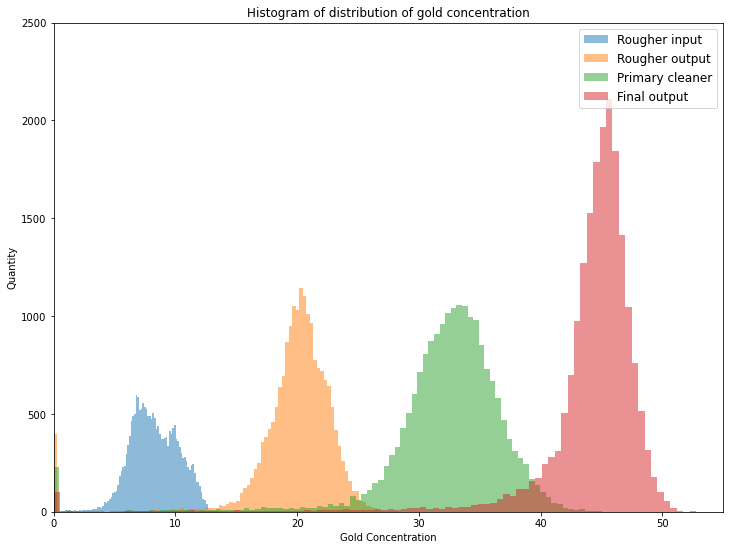

In [18]:
plt.figure(figsize=[12,9])

plt.hist(df_full['rougher.input.feed_au'], bins=100, label = 'Rougher input', alpha=.5)
plt.hist(df_full['rougher.output.concentrate_au'], bins=100, label = 'Rougher output', alpha=.5)
plt.hist(df_full['primary_cleaner.output.concentrate_au'], bins=100, label = 'Primary cleaner', alpha=.5)
plt.hist(df_full['final.output.concentrate_au'], bins=100, label = 'Final output', alpha=.5)

plt.xlim([0, 55])
plt.ylim([0, 2500])

plt.xlabel("Gold Concentration")
plt.ylabel("Quantity")

plt.legend(loc='upper right', fontsize = 'large')

plt.title("Histogram of distribution of gold concentration")
plt.show()

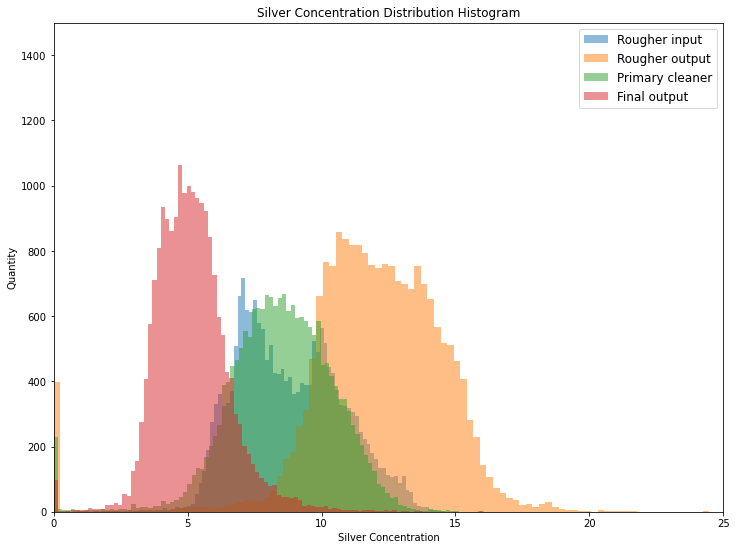

In [19]:
plt.figure(figsize=[12,9])

plt.hist(df_full['rougher.input.feed_ag'], bins=100, label = 'Rougher input', alpha=.5)
plt.hist(df_full['rougher.output.concentrate_ag'], bins=100, label = 'Rougher output', alpha=.5)
plt.hist(df_full['primary_cleaner.output.concentrate_ag'], bins=100, label = 'Primary cleaner', alpha=.5)
plt.hist(df_full['final.output.concentrate_ag'], bins=100, label = 'Final output', alpha=.5)

plt.xlim([0, 25])
plt.ylim([0, 1500])

plt.xlabel("Silver Concentration")
plt.ylabel("Quantity")

plt.legend(loc='upper right', fontsize = 'large')

plt.title("Silver Concentration Distribution Histogram")
plt.show()

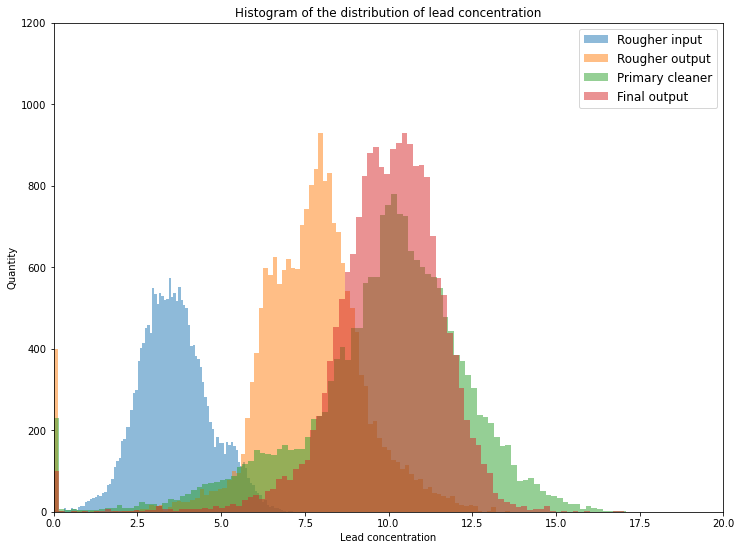

In [20]:
plt.figure(figsize=[12,9])

plt.hist(df_full['rougher.input.feed_pb'], bins=100, label = 'Rougher input', alpha=.5)
plt.hist(df_full['rougher.output.concentrate_pb'], bins=100, label = 'Rougher output', alpha=.5)
plt.hist(df_full['primary_cleaner.output.concentrate_pb'], bins=100, label = 'Primary cleaner', alpha=.5)
plt.hist(df_full['final.output.concentrate_pb'], bins=100, label = 'Final output', alpha=.5)

plt.xlim([0, 20])
plt.ylim([0, 1200])

plt.xlabel("Lead concentration")
plt.ylabel("Quantity")

plt.legend(loc='upper right', fontsize = 'large')

plt.title("Histogram of the distribution of lead concentration")
plt.show()




The following conclusions can be drawn:

- The concentration of gold in the final output becomes higher.
- The lowest concentration of gold and lead in the rouher input.
- The concentration of silver is higher during the primary cleaner, lower is in the final output.
- Lead concentration is higher during flotation and secondary cleaning.

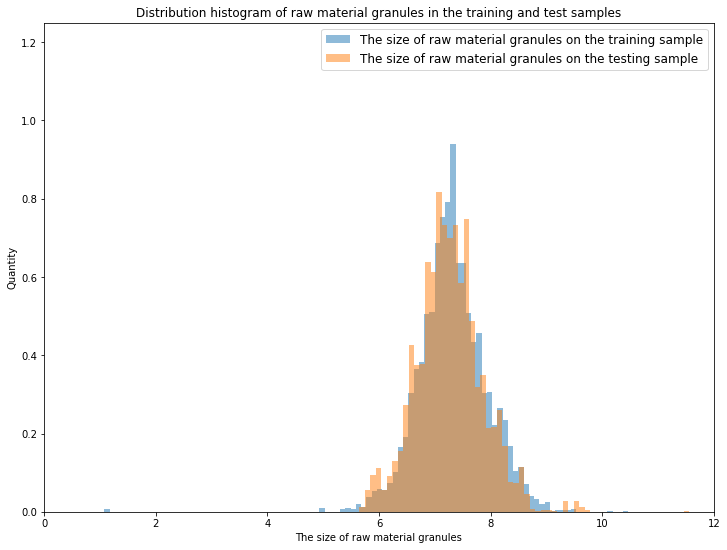

In [21]:
plt.figure(figsize=[12,9])

plt.hist(df_train['primary_cleaner.input.feed_size'], bins=100, label = 'The size of raw material granules on the training sample', alpha=.5, density=True)
plt.hist(df_test['primary_cleaner.input.feed_size'], bins=100, label = 'The size of raw material granules on the testing sample', alpha=.5, density=True)

plt.xlim([0, 12])
plt.ylim([0, 1.25])

plt.xlabel("The size of raw material granules")
plt.ylabel("Quantity")

plt.legend(loc='upper right', fontsize = 'large')

plt.title("Distribution histogram of raw material granules in the training and test samples")
plt.show()

The histogram shows that the size of raw material granules averages from 6 to 9. The size of raw material granules in the test and training samples is approximately the same. We investigate the total concentration of all substances at different stages: in raw materials, in rough and final concentrates.

In [25]:
rougher_output_sum = df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_ag'] + \
                    df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_sol']
primary_output_sum = df_full['primary_cleaner.output.concentrate_au'] + \
                    df_full['primary_cleaner.output.concentrate_ag'] + \
                    df_full['primary_cleaner.output.concentrate_pb'] + \
                    df_full['primary_cleaner.output.concentrate_sol']
final_output_sum = df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_ag'] + \
                    df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_sol']

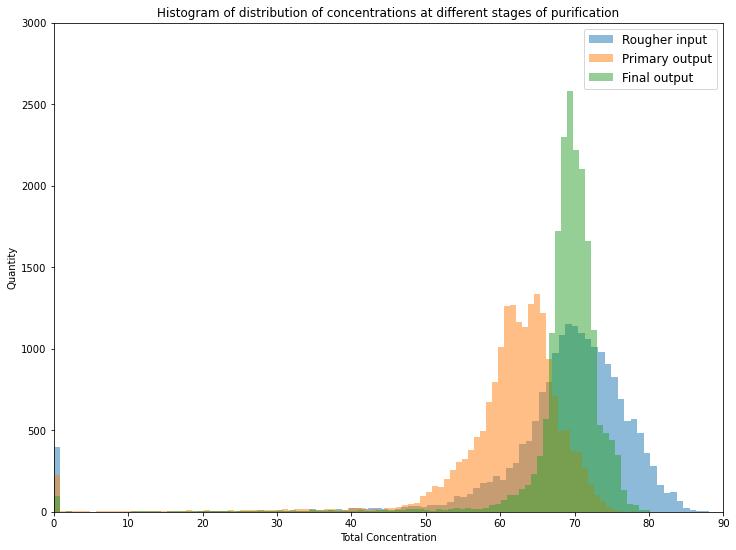

In [27]:
plt.figure(figsize=[12,9])

plt.hist(rougher_output_sum, bins=100, label = 'Rougher input', alpha=.5)
plt.hist(primary_output_sum, bins=100, label = 'Primary output', alpha=.5)
plt.hist(final_output_sum, bins=100, label = 'Final output', alpha=.5)

plt.xlim([0, 90])
plt.ylim([0, 3000])

plt.xlabel("Total Concentration")
plt.ylabel("Quantity")

plt.legend(loc='upper right', fontsize='large')

plt.title("Histogram of distribution of concentrations at different stages of purification")
plt.show();

From this histogram, it can be seen that the concentration of metals in the secondary treatment is higher, and there are also zero values in the primary and secondary treatment in the data.

Let's also remove all gaps in other columns and the `date` column. We do not need them when training the model.

In [28]:
df_train = df_train.fillna(method = 'ffill', axis = 0)
df_test = df_test.fillna(method = 'ffill', axis = 0)

In [29]:
df_train = df_train.drop(['date'], axis='columns')
df_test = df_test.drop(['date'], axis='columns')

In [30]:
df_train = df_train.drop(df_train[df_train['final.output.recovery'] == 0].index)
df_train = df_train.drop(df_train[df_train['rougher.output.recovery'] == 0].index)

In [31]:
df_train.shape

(13795, 54)

In [32]:
df_train.isna().mean()

final.output.recovery                         0.0
primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0


In [33]:
df_test.isna().mean()

primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0
rougher.input.floatbank10_xanthate            0.0


## Model

We need to build a function to calculate the final sMAPE.

The formulas we will be using are the following:

$$ SMAPE = (1/n) * Σ(|forecast – actual| / ((|actual| + |forecast|)/2) * 100 $$


 
$$ final  sMAPE = 25\% * sMAPE(rougher) + 75\% * sMAPE (final) $$


In [61]:
def smape(target_actual, target_predictions):
    numerator = np.abs(target_actual - target_predictions)
    denominator = (np.abs(target_actual) + np.abs(target_predictions)) / 2 
    return 1 / len(target_actual) * np.sum(numerator / denominator) * 100 

In [62]:
def final_smape(target_actual, target_predictions):
    target_actual_rougher = target_actual['rougher.output.recovery']
    target_actual_final = target_actual['final.output.recovery']
    
    target_predictions_rougher = target_predictions[:, 0]
    target_predictions_final = target_predictions[:, 1]
    
    return 0.25 * smape(target_actual_rougher, target_predictions_rougher) + 0.75 \
                * smape(target_actual_rougher, target_predictions_rougher)

In [63]:
smape_score = make_scorer(final_smape, greater_is_better=False)

The formulas are written, let's move on to training the models, we will use them to automatically select parameters for machine learning models.

In [55]:
features_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis='columns')
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]
features_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis='columns')
target_test = df_test[['rougher.output.recovery', 'final.output.recovery']]

In [56]:
%%time

param_tree = {'max_depth': range(2, 11)}
model_tree = DecisionTreeRegressor(random_state=12)
search_tree = GridSearchCV(model_tree, param_tree, cv=5, scoring=smape_score)
search_tree.fit(features_train, target_train)
print(f'sMAPE of the Decision Tree model: {search_tree.best_score_}')

sMAPE of the Decision Tree model: -7.2427865764158925
CPU times: total: 25.5 s
Wall time: 25.6 s


In [57]:
%%time

param_forest = {'n_estimators': range(10, 31, 10)}
model_forest = RandomForestRegressor(max_depth=2, random_state=12)
search_forest = GridSearchCV(model_forest, param_forest, cv=5, scoring=smape_score)
search_forest.fit(features_train, target_train)
print(f'sMAPE of Random Forest model: {search_forest.best_score_}')

sMAPE of Random Forest model: -7.118219679523536
CPU times: total: 39.6 s
Wall time: 39.7 s


In [58]:
%%time

model_lr = LinearRegression()
model_lr.fit(features_train, target_train)
smape = cross_val_score(model_lr, features_train, target_train, cv=5, scoring=smape_score).mean()
print(f'sMAPE of Linear Regression model: {smape}')

sMAPE of Linear Regression model: -7.267806730900402
CPU times: total: 1.12 s
Wall time: 400 ms


In [64]:
%%time

model_tree_test = DecisionTreeRegressor(random_state=12, max_depth = 2)
model_tree_test.fit(features_train, target_train)
predictions_test = model_tree_test.predict(features_test)

print(f'sMAPE of Decision Tree model on testing sample: {final_smape(target_test, predictions_test)}')

sMAPE of Decision Tree model on testing sample: 9.256082131842708
CPU times: total: 297 ms
Wall time: 296 ms


In [65]:
%%time

model = RandomForestRegressor(max_depth=2, n_estimators=20, random_state=12) 
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)

print('sMAPE of Random Forest model on testing sample:', final_smape(target_test, predictions_test))

sMAPE of Random Forest model on testing sample: 8.852889301348014
CPU times: total: 3.28 s
Wall time: 3.36 s


In [66]:
%%time

model_lr_test = LinearRegression()
model_lr_test.fit(features_train, target_train)
predictions_test = model_lr_test.predict(features_test)

print(f'sMAPE of Linear Regression on testing sample: {final_smape(target_test, predictions_test)}')

sMAPE of Linear Regression on testing sample: 8.554523519934913
CPU times: total: 188 ms
Wall time: 73.5 ms


In [67]:
%%time

dummy = DummyRegressor(strategy = 'mean')
dummy.fit(features_train, target_train)
predictions_test = dummy.predict(features_test)

print(f'sMAPE : {final_smape(target_test, predictions_test)}')

sMAPE : 9.066630806401538
CPU times: total: 31.2 ms
Wall time: 8 ms


The models are trained, the best sMAPE indicator was obtained on Linear Regression model, the model was tested on a test sample, the result is also high. Comparing with the DummyRegressorb indicators, we can conclude that the model is adequate, there is almost no difference in the values.

# Summary

- Preparation of the data and training models was conducted.
- Using formula we see that MAE is small, which means there are no differences between the data in the dataset.
- The histograms were built to see the concentration of the gold, silver, lead during different stages. 
- The concentration of gold in the final output becomes higher, whereas the concentration of silver is higher during the primary cleaner, and lead concentration during floatating and final output. 
- The size of raw material granules averages from 6 to 9. The size of raw material granules in the test and training samples is approximately the same.
- sMape and final sMAPE were calculated, the higher result showed Linear Regression which was tested on testing sample and Dummy Regressor. 